In [1]:
import tensorflow as tf

from smot.training import build_management
from smot.jupyter import model_reports
from smot.problems.mnist import mnist_lib

model_build_target = build_management.build_cache().target(
    name="mnist/simple",
)

In [2]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist_lib.load_mnist_data_28x28x1()

2021-12-20 01:28:39.916194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 01:28:39.916483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 01:28:39.943773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 01:28:39.944072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 01:28:39.944311: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [3]:
# Build a single softmax categorical layer.
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(
            input_shape=mnist_lib.INPUT_SHAPE,
        ),
        tf.keras.layers.Dense(
            units=128,
            activation="relu",
        ),
        tf.keras.layers.Dense(
            units=mnist_lib.N_CLASSES,
            activation="softmax",
        ),
    ]
)

# Compile using 'Adam'
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    # Needed for the categorical softmax layer.
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

# Print the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
120/375 [========>.....................] - ETA: 0s - loss: 0.6561 - accuracy: 0.8217

2021-12-20 01:28:42.288499: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


375/375 [==============================] - 2s 2ms/step - loss: 0.3982 - accuracy: 0.8892 - val_loss: 0.2164 - val_accuracy: 0.9412
Epoch 2/50
375/375 [==============================] - 1s 1ms/step - loss: 0.1870 - accuracy: 0.9474 - val_loss: 0.1561 - val_accuracy: 0.9561
Epoch 3/50
375/375 [==============================] - 1s 1ms/step - loss: 0.1356 - accuracy: 0.9605 - val_loss: 0.1349 - val_accuracy: 0.9584
Epoch 4/50
375/375 [==============================] - 1s 1ms/step - loss: 0.1058 - accuracy: 0.9702 - val_loss: 0.1219 - val_accuracy: 0.9645
Epoch 5/50
375/375 [==============================] - 1s 1ms/step - loss: 0.0860 - accuracy: 0.9757 - val_loss: 0.1048 - val_accuracy: 0.9698
Epoch 6/50
375/375 [==============================] - 1s 1ms/step - loss: 0.0712 - accuracy: 0.9803 - val_loss: 0.1016 - val_accuracy: 0.9703
Epoch 7/50
375/375 [==============================] - 1s 1ms/step - loss: 0.0601 - accuracy: 0.9832 - val_loss: 0.0946 - val_accuracy: 0.9722
Epoch 8/50
375/37

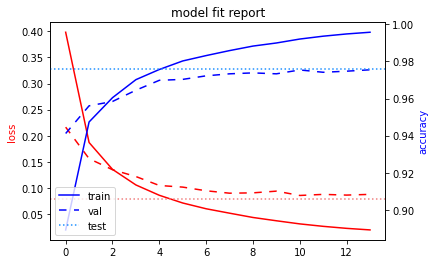

In [4]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=50,
    verbose=1,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3),
    ],
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model_reports.model_fit_report(
    model=model,
    history=history,
    test_data=(x_test, y_test),
)

In [5]:
# Optional:
# model_build_target.save_model(model)

# model = model_build_target.load_model()
# model.summary()